# Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings("ignore") 

# Read DataSet

In [11]:
data = pd.read_csv('final_data.csv')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S foundation,2019-10-16 00:00:00,2019.0,1.929941e+09,2019-10-01,20190929,20191001,20191016.0,USD,RV,1.0,NaN,134552.81,20191001.0,NAA8,1.929941e+09,0
1,U001,100001196,DOLLAR co,2019-08-01 00:00:00,2019.0,1.929617e+09,2019-07-16,20190715,20190716,20190731.0,USD,RV,1.0,NaN,64587.66,20190716.0,NAA8,1.929617e+09,0
2,U001,0200803720,DEC in,2020-01-29 00:00:00,2020.0,1.930443e+09,2020-01-27,20200127,20200127,20200126.0,USD,RV,1.0,NaN,8707.89,20200116.0,NAM2,1.930443e+09,0
3,U001,0200792734,MDV/ associates,2019-01-18 00:00:00,2019.0,1.928563e+09,2019-01-03,20190103,20190103,20190118.0,USD,RV,1.0,NaN,8103.89,20190103.0,NAA8,1.928563e+09,0
4,U001,0200416837,DEC trust,2019-12-02 00:00:00,2019.0,1.930183e+09,2019-11-22,20191122,20191122,20191209.0,USD,RV,1.0,NaN,717.84,20191116.0,NAM4,1.930183e+09,0


# Data PreProcessing

## Unique values check

In [12]:
#checking the unique values in different columns.
data.nunique()

business_code                 6
cust_number                1397
name_customer              4125
clear_date                  402
buisness_year                 2
doc_id                    48850
posting_date                502
document_create_date        507
document_create_date.1      502
due_in_date                 548
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44236
baseline_create_date        504
cust_payment_terms           76
invoice_id                48846
isOpen                        2
dtype: int64

#### We see that doc_id has maximum unique values.
#### Business year, invoice_currency, document_type and isOpen has 2 unique values.
#### Posting_id has only 1 unique value.
#### Area_business has no values.


## Null Values Check

In [13]:
# checking for null values in the datset
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

#### We see that:-
#### area_business is a null column.
#### clear_date has 10,000 null entries.
#### invoice_id has only 4 null entries.

In [14]:
# checking total null values
data.isna().sum().sum()

60004

In [15]:
# checking for null values in percentage
data.isnull().mean()*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.008
isOpen                      0.000
dtype: float64

#### We see from the result above that :
#### 20% values in clear_date are null
#### 100% values in area_business are null
#### 0.008% values in invoice_id are null

In [16]:
#dropping the area_business since  it is null and add no value
data.drop(['area_business'],axis=1, inplace=True)

In [17]:
# dropping the 4 null values in invoice_id.
data.drop(data.loc[data['invoice_id'].isnull()].index, inplace=True)

In [18]:
data.shape

(49996, 18)

## Duplicate Values check

In [23]:
#checking for duplicate rows and dropping them.
data.duplicated().sum()

1150

In [24]:
#dropping duplicate rows if any
data.drop_duplicates(inplace=True)


In [26]:
data.shape

(48846, 18)

In [28]:
#checking for duplicate columns and dropping them.
def findDuplicateColumns(df):
  duplicateColumnNames = set()
  for x in range(df.shape[1]-1):
    col1 = df.iloc[ : , x]
    for y in range(x+1, df.shape[1]):
      col2 = df.iloc[ : , y]
      if col1.equals(col2):
        duplicateColumnNames.add(df.columns.values[y])
  
  return list(duplicateColumnNames)


In [29]:

duplicated_columns = findDuplicateColumns(data) #calling the above function
print(duplicated_columns)   #prints the name of the duplicated column
data.drop(columns = duplicated_columns, inplace = True)  # dropped the duplicate column

['invoice_id']


## Structuring Date Columns

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48846 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           48846 non-null  object 
 1   cust_number             48846 non-null  object 
 2   name_customer           48846 non-null  object 
 3   clear_date              39144 non-null  object 
 4   buisness_year           48846 non-null  float64
 5   doc_id                  48846 non-null  float64
 6   posting_date            48846 non-null  object 
 7   document_create_date    48846 non-null  int64  
 8   document_create_date.1  48846 non-null  int64  
 9   due_in_date             48846 non-null  float64
 10  invoice_currency        48846 non-null  object 
 11  document type           48846 non-null  object 
 12  posting_id              48846 non-null  float64
 13  total_open_amount       48846 non-null  float64
 14  baseline_create_date    48846 non-null

#### Converting columns that contains date, from "object" type to "datetime64[ns]" 

#### 5 columns -> clear_date, document_create_date, document_create_date.1, due_in_date, _basline_create_date

In [31]:
data[['document_create_date', 'document_create_date.1','due_in_date', 'baseline_create_date']] = data[['document_create_date', 'document_create_date.1','due_in_date', 'baseline_create_date']].apply(pd.to_datetime, format='%Y%m%d')
data['clear_date'] = pd.to_datetime(data['clear_date'])
data.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200707005,KING S foundation,2019-10-16,2019.0,1.929941e+09,2019-10-01,2019-09-29,2019-10-01,2019-10-16,USD,RV,1.0,134552.81,2019-10-01,NAA8,0
1,U001,100001196,DOLLAR co,2019-08-01,2019.0,1.929617e+09,2019-07-16,2019-07-15,2019-07-16,2019-07-31,USD,RV,1.0,64587.66,2019-07-16,NAA8,0
2,U001,0200803720,DEC in,2020-01-29,2020.0,1.930443e+09,2020-01-27,2020-01-27,2020-01-27,2020-01-26,USD,RV,1.0,8707.89,2020-01-16,NAM2,0
3,U001,0200792734,MDV/ associates,2019-01-18,2019.0,1.928563e+09,2019-01-03,2019-01-03,2019-01-03,2019-01-18,USD,RV,1.0,8103.89,2019-01-03,NAA8,0
4,U001,0200416837,DEC trust,2019-12-02,2019.0,1.930183e+09,2019-11-22,2019-11-22,2019-11-22,2019-12-09,USD,RV,1.0,717.84,2019-11-16,NAM4,0


In [34]:
data.shape

(48846, 17)

## Adding traget column Delay

In [35]:
#creating delay column i.e the difference between the clear-date and the due-date 
data['delay'] = data['clear_date'] - data['due_in_date']
data['delay'] = data['delay'].apply(lambda x : x.days) 
data['delay']

0        0.0
1        1.0
2        3.0
3        0.0
4       -7.0
        ... 
49994    2.0
49995    9.0
49996    2.0
49997   -3.0
49999    1.0
Name: delay, Length: 48846, dtype: float64

In [36]:
data.tail()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
49994,U001,0200726979,BJ'S llc,2019-07-01,2019.0,1.929540e+09,2019-06-14,2019-06-25,2019-06-14,2019-06-29,USD,RV,1.0,549.70,2019-06-14,NAA8,0,2.0
49995,CA02,0140106408,WAL-M trust,2019-02-19,2019.0,2.960527e+09,2019-01-31,2019-01-31,2019-01-31,2019-02-10,CAD,RV,1.0,19257.95,2019-01-31,CA10,0,9.0
49996,U001,0200759878,SA us,2019-10-15,2019.0,1.929933e+09,2019-09-28,2019-09-27,2019-09-28,2019-10-13,USD,RV,1.0,14257.87,2019-09-28,NAH4,0,2.0
49997,U001,0200769623,WAL-MAR co,2019-04-09,2019.0,1.929046e+09,2019-03-28,2019-03-28,2019-03-28,2019-04-12,USD,RV,1.0,66064.40,2019-03-28,NAH4,0,-3.0
49999,U001,0200790710,F us,2020-03-05,2020.0,1.930532e+09,2020-02-18,2020-02-15,2020-02-18,2020-03-04,USD,RV,1.0,36808.53,2020-02-18,NAA8,0,1.0


# Splitting the dataset

In [37]:
# creating the test set which consists of the rows with null value for clear_date
test_data = data[data.clear_date.isnull()].reset_index(drop=True)
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,USD,RV,1.0,12781.33,2020-04-23,NAH4,1,NaN
1,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930700e+09,2020-03-27,2020-03-25,2020-03-27,2020-04-11,USD,RV,1.0,5269.89,2020-03-27,NAH4,1,NaN
2,U001,0200707822,PUBLI us,NaT,2020.0,1.930670e+09,2020-03-18,2020-03-19,2020-03-18,2020-04-02,USD,RV,1.0,103792.96,2020-03-18,NAA8,1,NaN
3,U001,0200148860,DOLLA us,NaT,2020.0,1.930861e+09,2020-05-06,2020-05-05,2020-05-06,2020-05-21,USD,RV,1.0,93256.68,2020-05-06,NAA8,1,NaN
4,U001,200769623,WAL-MAR trust,NaT,2020.0,1.930683e+09,2020-03-23,2020-03-21,2020-03-23,2020-04-07,USD,RV,1.0,12924.68,2020-03-23,NAH4,1,NaN


In [38]:
# All 10,000 clear_date nulls are now in the test_data set 
test_data.shape

(9702, 18)

In [39]:
#The remaining data is shifted to big_set. big_set= Data - test_data
big_set = data[data.clear_date.notnull()].reset_index(drop=True)
big_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200707005,KING S foundation,2019-10-16,2019.0,1.929941e+09,2019-10-01,2019-09-29,2019-10-01,2019-10-16,USD,RV,1.0,134552.81,2019-10-01,NAA8,0,0.0
1,U001,100001196,DOLLAR co,2019-08-01,2019.0,1.929617e+09,2019-07-16,2019-07-15,2019-07-16,2019-07-31,USD,RV,1.0,64587.66,2019-07-16,NAA8,0,1.0
2,U001,0200803720,DEC in,2020-01-29,2020.0,1.930443e+09,2020-01-27,2020-01-27,2020-01-27,2020-01-26,USD,RV,1.0,8707.89,2020-01-16,NAM2,0,3.0
3,U001,0200792734,MDV/ associates,2019-01-18,2019.0,1.928563e+09,2019-01-03,2019-01-03,2019-01-03,2019-01-18,USD,RV,1.0,8103.89,2019-01-03,NAA8,0,0.0
4,U001,0200416837,DEC trust,2019-12-02,2019.0,1.930183e+09,2019-11-22,2019-11-22,2019-11-22,2019-12-09,USD,RV,1.0,717.84,2019-11-16,NAM4,0,-7.0


In [40]:
big_set.shape

(39144, 18)

In [41]:
print(f'big_test size====>{big_set.shape[0]}\ntest_data size===>{test_data.shape[0]}\ndata size========>{data.shape[0]}')

big_test size====>39144
test_data size===>9702
data size========>48846


#### (big_set)39996 + (test_data)10000 == 49996(data)

## Spliting Big_set into test data and validation data

In [42]:
# creating val1, val2(validation sets) and train_data(train set) using big_set

val2 = big_set[big_set['document_create_date.1'] > '2020-01-15']  # val2 conatins dates greater than 15th jan 2020
temp = big_set[big_set['document_create_date.1'] <= '2020-01-15'] # temp variable with remaining dates

val1 = temp[temp['document_create_date.1'] > '2019-11-15']  # val1 contains dates  15th Nov 2019 - 15th Jan 2020
train_data = temp[temp['document_create_date.1'] <= '2019-11-15'] #train_data contains dates before 15th Nov 2020

In [43]:
#checking shape of validtion data sets and training data
print("train_data:",train_data.shape)
print("val1      :",val1.shape)
print("val2      :",val2.shape)

train_data: (31119, 18)
val1      : (4328, 18)
val2      : (3697, 18)


## Sorting all the datasets in increasing according by document_create_date.1




In [44]:
train_data = train_data.sort_values(by='document_create_date.1').reset_index(drop=True)
val1 = val1.sort_values(by='document_create_date.1').reset_index(drop=True)
val2 = val2.sort_values(by='document_create_date.1').reset_index(drop=True)
test_data = test_data.sort_values(by='document_create_date.1').reset_index(drop=True)
final_data_test=test_data[["name_customer","cust_number","doc_id","total_open_amount","due_in_date"]]

In [45]:
final_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name_customer      9702 non-null   object        
 1   cust_number        9702 non-null   object        
 2   doc_id             9702 non-null   float64       
 3   total_open_amount  9702 non-null   float64       
 4   due_in_date        9702 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 379.1+ KB


In [46]:
print(f"train_data\n{train_data['document_create_date.1']}")
print("~" * 50)
print(f"val1\n{val1['document_create_date.1']}")
print("~" * 50)
print(f"val2\n{val2['document_create_date.1']}")
print("~" * 50)
print(f"test_data\n{test_data['document_create_date.1']}")

train_data
0       2018-12-30
1       2018-12-30
2       2018-12-30
3       2018-12-30
4       2018-12-30
           ...    
31114   2019-11-15
31115   2019-11-15
31116   2019-11-15
31117   2019-11-15
31118   2019-11-15
Name: document_create_date.1, Length: 31119, dtype: datetime64[ns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
val1
0      2019-11-16
1      2019-11-16
2      2019-11-16
3      2019-11-16
4      2019-11-16
          ...    
4323   2020-01-15
4324   2020-01-15
4325   2020-01-15
4326   2020-01-15
4327   2020-01-15
Name: document_create_date.1, Length: 4328, dtype: datetime64[ns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
val2
0      2020-01-16
1      2020-01-16
2      2020-01-16
3      2020-01-16
4      2020-01-16
          ...    
3692   2020-02-26
3693   2020-02-26
3694   2020-02-26
3695   2020-02-27
3696   2020-02-27
Name: document_create_date.1, Length: 3697, dtype: datetime64[ns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
test_data
0      2020-

## Seperating the Target Variable i.e. delay 

In [47]:
X_train = train_data[train_data.columns.difference(['delay'])]  # X_train = train_data - delay(i.e. Target variable)
Y_train = train_data[['delay']]

X_val1 = val1[val1.columns.difference(['delay'])] # X_val1 = val1 - delay
Y_val1 = val1[['delay']]

X_val2 = val2[val2.columns.difference(['delay'])] # X_val2 = val2 - delay
Y_val2 = val2[['delay']]

X_test = test_data[test_data.columns.difference(['delay'])] # X_test = test_data - delay
Y_test = test_data[['delay']]

# Checking for constant and Quasi constant columns

In [48]:
X_train.nunique()

baseline_create_date        333
buisness_year                 1
business_code                 6
clear_date                  297
cust_number                1252
cust_payment_terms           67
doc_id                    31119
document type                 1
document_create_date        328
document_create_date.1      321
due_in_date                 364
invoice_currency              2
isOpen                        1
name_customer              3488
posting_date                321
posting_id                    1
total_open_amount         28461
dtype: int64

## Checking for constant columns.

In [50]:
#checking for constant columns
constant_features = [
    col for col in X_train.columns if X_train[col].nunique() == 1
]
constant_features

['buisness_year', 'document type', 'isOpen', 'posting_id']

In [51]:
#dropping all the constant columns
X_train.drop(labels = constant_features, axis=1, inplace=True)
X_val1.drop(labels = constant_features, axis=1, inplace=True)
X_val2.drop(labels = constant_features, axis=1, inplace=True)
X_test.drop(labels = constant_features, axis=1, inplace=True)

print(X_train.shape)
print(X_val1.shape)
print(X_val2.shape)
print(X_test.shape)

(31119, 13)
(4328, 13)
(3697, 13)
(9702, 13)


In [52]:
X_train.nunique()

baseline_create_date        333
business_code                 6
clear_date                  297
cust_number                1252
cust_payment_terms           67
doc_id                    31119
document_create_date        328
document_create_date.1      321
due_in_date                 364
invoice_currency              2
name_customer              3488
posting_date                321
total_open_amount         28461
dtype: int64

#### no more columns with contant values

## Checking for Quasi constant columns

In [53]:
X_train['business_code'].value_counts(normalize=True)*100

U001    90.401363
CA02     7.731611
U013     1.491050
U002     0.334201
U005     0.032135
U007     0.009640
Name: business_code, dtype: float64

In [54]:
X_train['invoice_currency'].value_counts(normalize=True)*100

USD    92.268389
CAD     7.731611
Name: invoice_currency, dtype: float64

In [56]:
X_train['cust_payment_terms'].value_counts(normalize=True)*100

NAA8    40.383688
NAH4    25.968058
CA10     7.509881
NAC6     3.190977
NAM4     2.564350
          ...    
B112     0.003213
MC15     0.003213
BR12     0.003213
NAUY     0.003213
B052     0.003213
Name: cust_payment_terms, Length: 67, dtype: float64

#### We see that business_code and invoice_currency are quasi constant columns as in business_code 90.253639% values are U001 
#### and in invoice_currency 91.986205% values are USD.


In [57]:
X_train[['total_open_amount','invoice_currency']].tail()

,total_open_amount,invoice_currency
31114,94225.35,USD
31115,24933.47,USD
31116,78385.32,USD
31117,21733.06,CAD
31118,18845.67,USD


In [58]:
#changing the total_open_amount where invoice currency is CAD 
X_train.total_open_amount=np.where(X_train.invoice_currency=="CAD",X_train.total_open_amount*.8,X_train.total_open_amount)

In [59]:
# dropping quasi constant features
X_train.drop('business_code', axis=1, inplace=True)
X_val1.drop('business_code', axis=1, inplace=True)
X_val2.drop('business_code', axis=1, inplace=True)
X_test.drop('business_code', axis=1, inplace=True)


X_train.drop('invoice_currency', axis=1, inplace=True)
X_val1.drop('invoice_currency', axis=1, inplace=True)
X_val2.drop('invoice_currency', axis=1, inplace=True)
X_test.drop('invoice_currency', axis=1, inplace=True)

In [61]:
print(X_train.shape[0],len(np.where(X_train['document_create_date.1'] == X_train['posting_date'], X_train['document_create_date.1'], X_train['posting_date'])))

31119 31119


#### We see that the positing_date and the document_create_date.1 are equal. So we'll drop posting_date.

In [62]:
X_train.drop('posting_date', axis=1, inplace=True)
X_val1.drop('posting_date', axis=1, inplace=True)
X_val2.drop('posting_date', axis=1, inplace=True)
X_test.drop('posting_date', axis=1, inplace=True)

In [63]:
# dropping document_create_date as its normalized form is document_create_date.1
X_train.drop('document_create_date', axis=1, inplace=True)
X_val1.drop('document_create_date', axis=1, inplace=True)
X_val2.drop('document_create_date', axis=1, inplace=True)
X_test.drop('document_create_date', axis=1, inplace=True)

In [64]:
# We do not use ID columns in train set hence dropping doc_id from X_train
#because its non repeating 
X_train.drop('doc_id', axis=1, inplace=True)

In [65]:
print(X_train.shape)
print(X_val1.shape)
print(X_val2.shape)
print(X_test.shape)

(31119, 8)
(4328, 9)
(3697, 9)
(9702, 9)


In [66]:
X_train.dtypes

baseline_create_date      datetime64[ns]
clear_date                datetime64[ns]
cust_number                       object
cust_payment_terms                object
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
name_customer                     object
total_open_amount                float64
dtype: object

In [67]:
#converting total_open_amount to integer type
X_train['total_open_amount'] = X_train['total_open_amount'].astype(int)
X_train['total_open_amount'].dtype

dtype('int32')

Text(0.5, 1.0, 'Scatterplot total_open_amount VS delay')

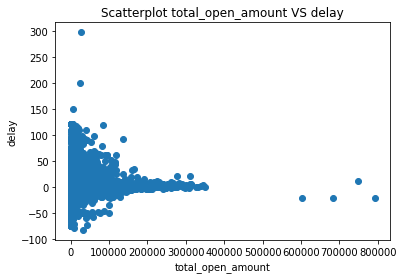

In [75]:
plt.scatter(X_train['total_open_amount'], Y_train['delay'])
plt.xlabel('total_open_amount')
plt.ylabel('delay')
plt.title('Scatterplot total_open_amount VS delay')

#### mostly total_open_amount is below 2 lakhs anad paid within 100 days 


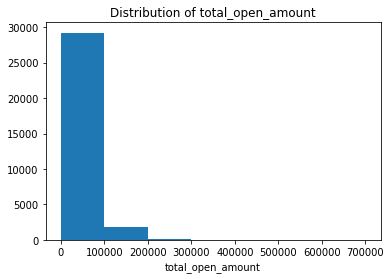

In [76]:
bins=range(0,800000,100000)
plt.hist(X_train['total_open_amount'],bins=bins)
plt.xlabel('total_open_amount')
plt.title('Distribution of total_open_amount')
plt.show()

##### most total_open_amount are in range 0-1lac  are arounf 30k

<AxesSubplot:xlabel='total_open_amount'>

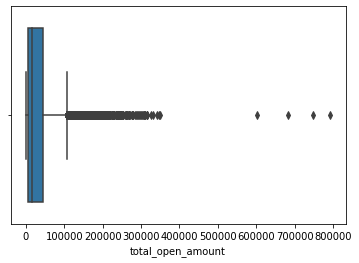

In [77]:
sns.boxplot(x=X_train['total_open_amount'])

#### most of the outliers exist in the range 1-4 lacs

In [78]:
Q1 = X_train['total_open_amount'].quantile(0.25)
Q2 = X_train['total_open_amount'].quantile(0.50)
Q3 = X_train['total_open_amount'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 : ' + str(Q1))
print('Q2 : ' + str(Q2))
print('Q3 : ' + str(Q3))
print('IQR : ' + str(IQR))
print('~'*20)
print('Minimum : ' + str(Q1 - 1.5*IQR))
print('Maximum : ' + str(Q3+1.5*IQR))

Q1 : 4549.5
Q2 : 16977.0
Q3 : 45628.5
IQR : 41079.0
~~~~~~~~~~~~~~~~~~~~
Minimum : -57069.0
Maximum : 107247.0


In [79]:
Y_train.delay.describe()

count    31119.000000
mean         1.071660
std         11.270278
min        -83.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        297.000000
Name: delay, dtype: float64

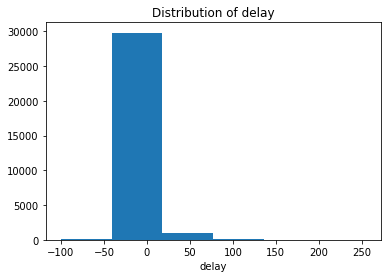

In [80]:
plt.hist(Y_train['delay'],bins=range(-100,300,59))
plt.xlabel('delay')
plt.title('Distribution of delay')
plt.show()

# Feature Engineering

## Baseline_create_date

In [81]:
# engineering the baseline_create_date using .dt
X_train['baseline_create_date_month']      = X_train.baseline_create_date.dt.month   #extracting month from baseline_create_date
X_train['baseline_create_date_quarter']    = X_train.baseline_create_date.dt.quarter  #extracting quarter from baseline_create_date
X_train['baseline_create_date_dayofweek']  = X_train.baseline_create_date.dt.dayofweek  #extracting day from baseline_create_date
X_train['baseline_create_date_isweekend']  = np.where(X_train['baseline_create_date_dayofweek'].isin([5, 6]),1,0)  #extracting weekends from baseline_create_date
X_train.drop('baseline_create_date', axis=1, inplace=True)

In [82]:
X_train.head()

,clear_date,cust_number,cust_payment_terms,document_create_date.1,due_in_date,name_customer,total_open_amount,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_isweekend
0,2019-01-09,0200769623,NAH4,2018-12-30,2019-01-14,WAL-MAR foundation,16511,12,4,6,1
1,2019-01-14,0200707822,NAA8,2018-12-30,2019-01-14,PUBLI in,87305,12,4,6,1
2,2019-01-15,0200794332,NAAX,2018-12-30,2019-01-14,COST us,51473,12,4,6,1
3,2019-01-14,0200705372,NAA8,2018-12-30,2019-01-14,FR corp,11539,12,4,6,1
4,2019-01-22,0200744019,NAA8,2018-12-30,2019-01-14,TARG co,1372,12,4,6,1


## Document_create_date.1

In [83]:
# engineering the document_create_date.1 using .dt
X_train['document_create_date.1_month'] = X_train['document_create_date.1'].dt.month   #extracting month from document_create_date
X_train['document_create_date.1_quarter']  = X_train['document_create_date.1'].dt.quarter  #extracting quarter from document_create_date
X_train['document_create_date.1_dayofweek']  = X_train['document_create_date.1'].dt.dayofweek  #extracting day from document_create_date
X_train['document_create_date.1_isweekend']  = np.where(X_train['document_create_date.1_dayofweek'].isin([5, 6]),1,0)  #extracting weekends from document_create_date


In [84]:
X_train.head()

,clear_date,cust_number,cust_payment_terms,document_create_date.1,due_in_date,name_customer,total_open_amount,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_isweekend,document_create_date.1_month,document_create_date.1_quarter,document_create_date.1_dayofweek,document_create_date.1_isweekend
0,2019-01-09,0200769623,NAH4,2018-12-30,2019-01-14,WAL-MAR foundation,16511,12,4,6,1,12,4,6,1
1,2019-01-14,0200707822,NAA8,2018-12-30,2019-01-14,PUBLI in,87305,12,4,6,1,12,4,6,1
2,2019-01-15,0200794332,NAAX,2018-12-30,2019-01-14,COST us,51473,12,4,6,1,12,4,6,1
3,2019-01-14,0200705372,NAA8,2018-12-30,2019-01-14,FR corp,11539,12,4,6,1,12,4,6,1
4,2019-01-22,0200744019,NAA8,2018-12-30,2019-01-14,TARG co,1372,12,4,6,1,12,4,6,1


## Encoding Variables

In [85]:
X_train['name_customer'].nunique()

3488

#### We see that, out of 31780 rows 3488 name_customer are unique. We can put these names in a column

In [86]:
X_train['name_customer'].value_counts() 

WAL-MAR associates     694
WAL-MAR systems        691
WAL-MAR co             675
WAL-MAR llc            669
WAL-MAR corporation    667
                      ... 
KEHE  llc                1
POWE trust               1
IRA HI corporation       1
APPE corporation         1
H.J. HEI foundation      1
Name: name_customer, Length: 3488, dtype: int64

In [87]:
pd.Series(X_train['name_customer'].value_counts() < 2).value_counts()

False    1915
True     1573
Name: name_customer, dtype: int64

 #### 1537 values are below 2

In [88]:
customer_labels = X_train['name_customer'].unique() #putting all the unique labels in customer_labels
freq = X_train['name_customer'].value_counts()
threshold = 0.01 * freq.max()
customer_labels_final = [x for x in customer_labels if freq[x] > threshold]
len(customer_labels_final)

720

#### By categorizing the labels with freq less than 0.01*max as others, the nunique value will change from 3488   to 660.

In [89]:
# changing the names of the customers for which the threshold is not met
X_train['new_name_customer'] = pd.Series([x if x in customer_labels_final else 'others' for x in X_train['name_customer']])
X_val1['new_name_customer'] = pd.Series([x if x in customer_labels_final else 'others' for x in X_val1['name_customer']])
X_val2['new_name_customer'] = pd.Series([x if x in customer_labels_final else 'others' for x in X_val2['name_customer']])
X_test['new_name_customer'] = pd.Series([x if x in customer_labels_final else 'others' for x in X_test['name_customer']])

In [90]:
# encoding new_name_customer
label_encoder = LabelEncoder()
X_train['new_name_customer'] = label_encoder.fit_transform(X_train['new_name_customer'])
X_val1['new_name_customer'] = label_encoder.transform(X_val1['new_name_customer'])
X_val2['new_name_customer'] = label_encoder.transform(X_val2['new_name_customer'])
X_test['new_name_customer'] = label_encoder.transform(X_test['new_name_customer'])

In [91]:
X_train.head()

,clear_date,cust_number,cust_payment_terms,document_create_date.1,due_in_date,name_customer,total_open_amount,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_isweekend,document_create_date.1_month,document_create_date.1_quarter,document_create_date.1_dayofweek,document_create_date.1_isweekend,new_name_customer
0,2019-01-09,0200769623,NAH4,2018-12-30,2019-01-14,WAL-MAR foundation,16511,12,4,6,1,12,4,6,1,694
1,2019-01-14,0200707822,NAA8,2018-12-30,2019-01-14,PUBLI in,87305,12,4,6,1,12,4,6,1,455
2,2019-01-15,0200794332,NAAX,2018-12-30,2019-01-14,COST us,51473,12,4,6,1,12,4,6,1,113
3,2019-01-14,0200705372,NAA8,2018-12-30,2019-01-14,FR corp,11539,12,4,6,1,12,4,6,1,190
4,2019-01-22,0200744019,NAA8,2018-12-30,2019-01-14,TARG co,1372,12,4,6,1,12,4,6,1,625


In [92]:
X_train.cust_payment_terms.nunique()

67

In [93]:
cust_payment_labels = X_train['cust_payment_terms'].unique() #putting all the unique labels in cust_payment_labels
freq = X_train['cust_payment_terms'].value_counts()
threshold = 0.01 * freq.max()
cust_payment_terms_final = [x for x in cust_payment_labels if freq[x] > threshold]
len(cust_payment_terms_final)

19

#### By categorizing the labels with freq less than 0.01*max as others, the nunique value will change from 67 to 20.

In [94]:
X_train['new_cust_payment_terms'] = pd.Series([x if x in cust_payment_terms_final else 'others' for x in X_train['cust_payment_terms']])
X_val1['new_cust_payment_terms'] = pd.Series([x if x in cust_payment_terms_final else 'others' for x in X_val1['cust_payment_terms']])
X_val2['new_cust_payment_terms'] = pd.Series([x if x in cust_payment_terms_final else 'others' for x in X_val2['cust_payment_terms']])
X_test['new_cust_payment_terms'] = pd.Series([x if x in cust_payment_terms_final else 'others' for x in X_test['cust_payment_terms']])

In [95]:
# encoding new_cust_payment_terms
label_encoder = LabelEncoder()
X_train['new_cust_payment_terms'] = label_encoder.fit_transform(X_train['new_cust_payment_terms'])
X_val1['new_cust_payment_terms'] = label_encoder.transform(X_val1['new_cust_payment_terms'])
X_val2['new_cust_payment_terms'] = label_encoder.transform(X_val2['new_cust_payment_terms'])
X_test['new_cust_payment_terms'] = label_encoder.transform(X_test['new_cust_payment_terms'])

In [96]:
X_train.head()

,clear_date,cust_number,cust_payment_terms,document_create_date.1,due_in_date,name_customer,total_open_amount,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_isweekend,document_create_date.1_month,document_create_date.1_quarter,document_create_date.1_dayofweek,document_create_date.1_isweekend,new_name_customer,new_cust_payment_terms
0,2019-01-09,0200769623,NAH4,2018-12-30,2019-01-14,WAL-MAR foundation,16511,12,4,6,1,12,4,6,1,694,11
1,2019-01-14,0200707822,NAA8,2018-12-30,2019-01-14,PUBLI in,87305,12,4,6,1,12,4,6,1,455,3
2,2019-01-15,0200794332,NAAX,2018-12-30,2019-01-14,COST us,51473,12,4,6,1,12,4,6,1,113,5
3,2019-01-14,0200705372,NAA8,2018-12-30,2019-01-14,FR corp,11539,12,4,6,1,12,4,6,1,190,3
4,2019-01-22,0200744019,NAA8,2018-12-30,2019-01-14,TARG co,1372,12,4,6,1,12,4,6,1,625,3


In [98]:
X_train.cust_number.nunique()

1252

In [99]:
cust_number_labels = X_train['cust_number'].unique() #putting all the unique labels in cust_number_labels
freq = X_train['cust_number'].value_counts()
threshold = 0.01 * freq.max()
cust_number_final = [x for x in cust_number_labels if freq[x] > threshold]
len(cust_number_final)

72

#### By categorizing the labels with freq less than 0.01*max as others, the nunique value will change from 1252 to 72.

In [100]:
X_train['new_cust_number'] = pd.Series([x if x in cust_number_final else 'others' for x in X_train['cust_number']])
X_val1['new_cust_number'] = pd.Series([x if x in cust_number_final else 'others' for x in X_val1['cust_number']])
X_val2['new_cust_number'] = pd.Series([x if x in cust_number_final else 'others' for x in X_val2['cust_number']])
X_test['new_cust_number'] = pd.Series([x if x in cust_number_final else 'others' for x in X_test['cust_number']])

In [101]:
# encoding new_cust_number
label_encoder = LabelEncoder()
X_train['new_cust_number'] = label_encoder.fit_transform(X_train['new_cust_number'])
X_val1['new_cust_number'] = label_encoder.transform(X_val1['new_cust_number'])
X_val2['new_cust_number'] = label_encoder.transform(X_val2['new_cust_number'])
X_test['new_cust_number'] = label_encoder.transform(X_test['new_cust_number'])

In [102]:
X_train.head()

,clear_date,cust_number,cust_payment_terms,document_create_date.1,due_in_date,name_customer,total_open_amount,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_isweekend,document_create_date.1_month,document_create_date.1_quarter,document_create_date.1_dayofweek,document_create_date.1_isweekend,new_name_customer,new_cust_payment_terms,new_cust_number
0,2019-01-09,0200769623,NAH4,2018-12-30,2019-01-14,WAL-MAR foundation,16511,12,4,6,1,12,4,6,1,694,11,43
1,2019-01-14,0200707822,NAA8,2018-12-30,2019-01-14,PUBLI in,87305,12,4,6,1,12,4,6,1,455,3,28
2,2019-01-15,0200794332,NAAX,2018-12-30,2019-01-14,COST us,51473,12,4,6,1,12,4,6,1,113,5,58
3,2019-01-14,0200705372,NAA8,2018-12-30,2019-01-14,FR corp,11539,12,4,6,1,12,4,6,1,190,3,24
4,2019-01-22,0200744019,NAA8,2018-12-30,2019-01-14,TARG co,1372,12,4,6,1,12,4,6,1,625,3,35


#### Now that we have encoded name_customer, cust_payment_terms and cust_number we can drop these columns.

In [105]:
X_train.drop(['name_customer','cust_payment_terms','cust_number'], axis=1, inplace=True)
X_val1.drop(['name_customer','cust_payment_terms','cust_number'], axis=1, inplace=True)
X_val2.drop(['name_customer','cust_payment_terms','cust_number'], axis=1, inplace=True)
X_test.drop(['name_customer','cust_payment_terms','cust_number'], axis=1, inplace=True)

KeyError: "['name_customer' 'cust_payment_terms' 'cust_number'] not found in axis"

In [106]:
X_train.head()

,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_isweekend,document_create_date.1_month,document_create_date.1_quarter,document_create_date.1_dayofweek,document_create_date.1_isweekend,new_name_customer,new_cust_payment_terms,new_cust_number
0,2019-01-09,2018-12-30,2019-01-14,16511,12,4,6,1,12,4,6,1,694,11,43
1,2019-01-14,2018-12-30,2019-01-14,87305,12,4,6,1,12,4,6,1,455,3,28
2,2019-01-15,2018-12-30,2019-01-14,51473,12,4,6,1,12,4,6,1,113,5,58
3,2019-01-14,2018-12-30,2019-01-14,11539,12,4,6,1,12,4,6,1,190,3,24
4,2019-01-22,2018-12-30,2019-01-14,1372,12,4,6,1,12,4,6,1,625,3,35


In [107]:
# delay = clear - due
# +ve -> paid early
# -ve -> late payment
X_train['paid_early'] = np.where(Y_train['delay'] >= 0, 1,0)

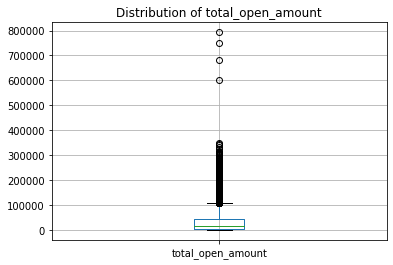

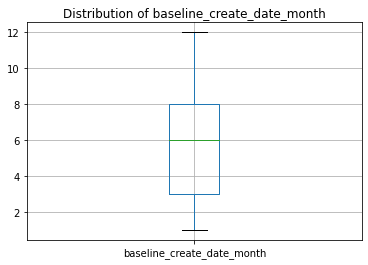

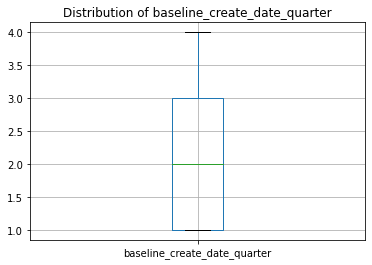

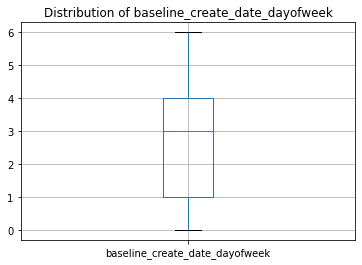

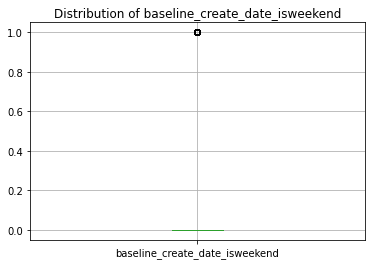

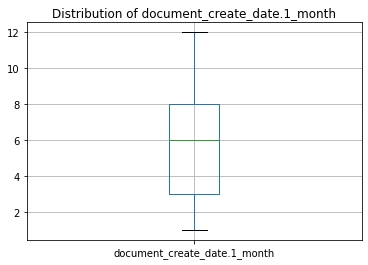

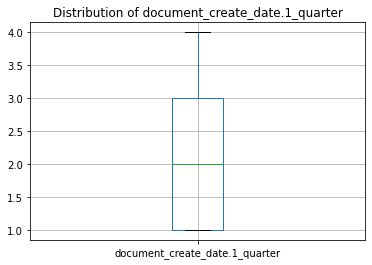

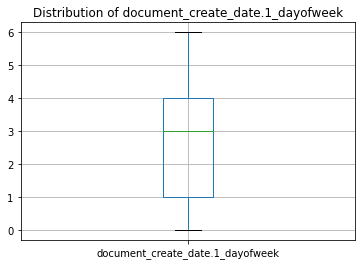

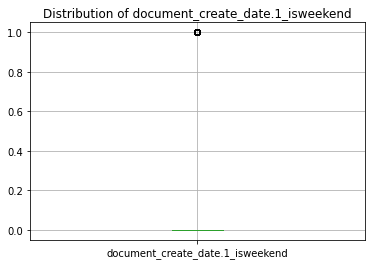

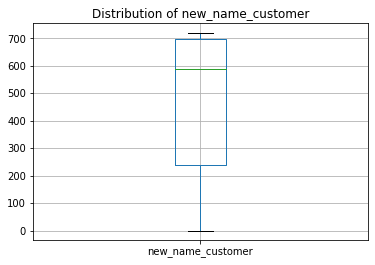

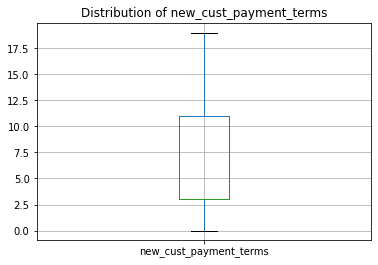

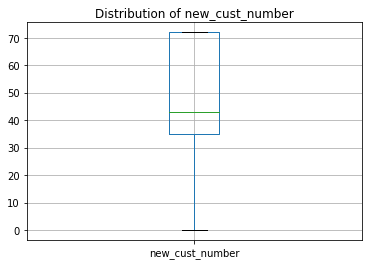

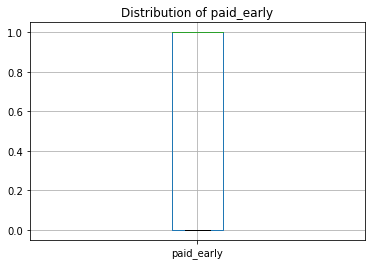

In [108]:
# boxplots of all the features
for cols in X_train.iloc[ :  , 3: ]:
  plt.figure()
  plt.title("Distribution of " + cols)
  X_train.boxplot(cols)

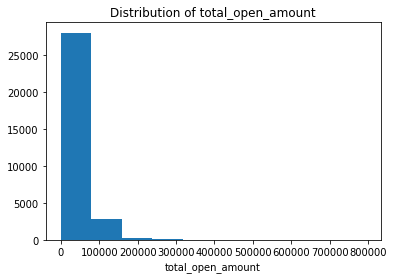

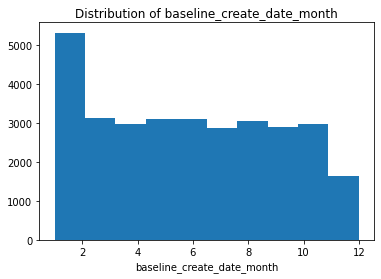

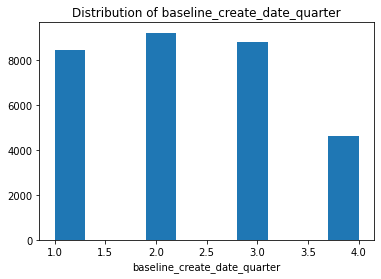

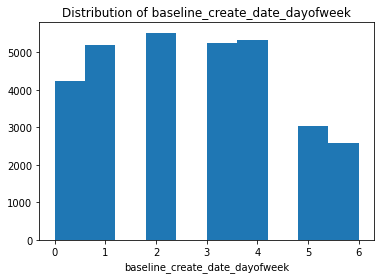

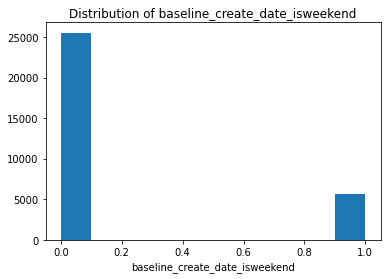

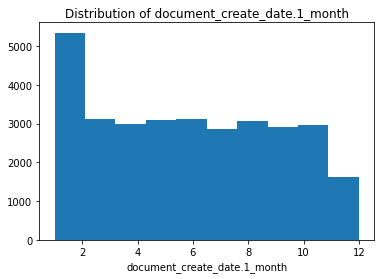

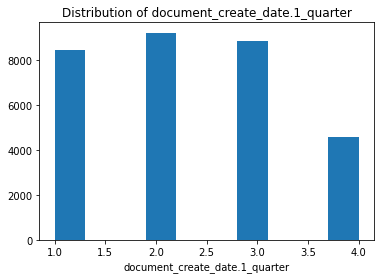

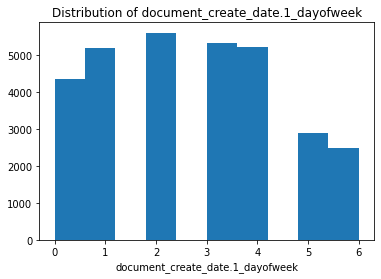

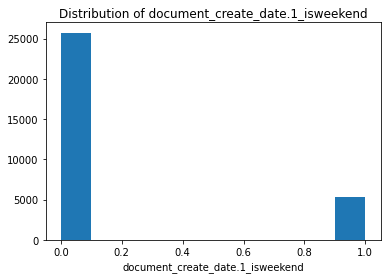

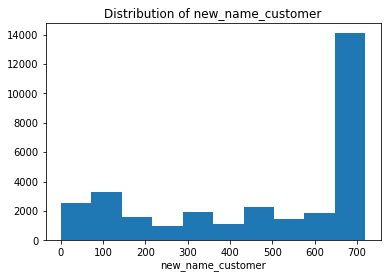

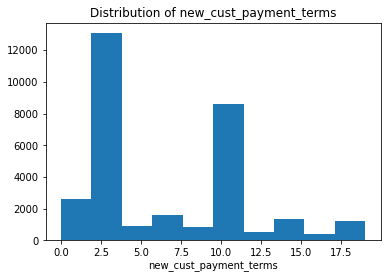

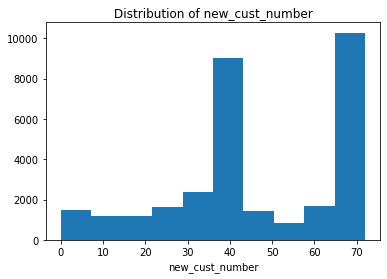

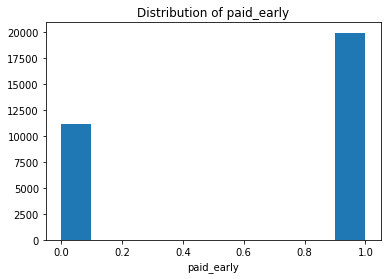

In [109]:
# histograms of all the features.
for cols in X_train.iloc[ :  , 3: ]:
  plt.hist(X_train[cols])
  plt.xlabel(cols)
  plt.title("Distribution of " + cols)
  plt.show()

In [111]:
X_train.shape

(31119, 16)

#Feature Selection

## Correlation 

<AxesSubplot:>

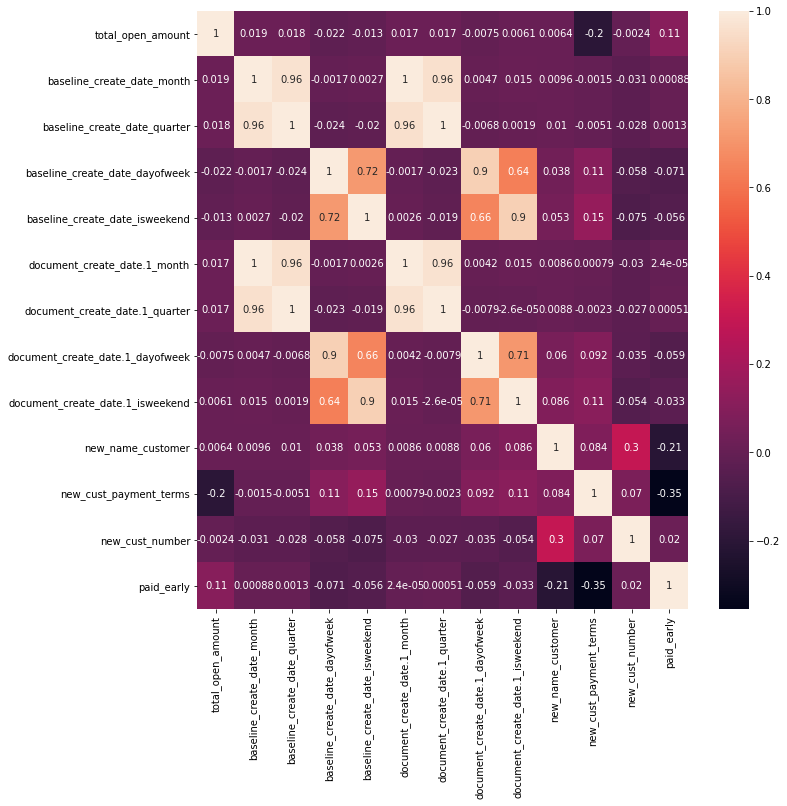

In [112]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X_train.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True)



#### If two variables are highly correlated among themselves, they provide redundant information in regards to the target.  Essentially, we can make an accurate prediction on the target with just one of the redundant variables.

#### In these case, the second variable doesn’t add additional information, so removing it can help reduce the dimensionality and also the added noise.

In [113]:
# selecting the columns with correlation greater than 0.90
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.90:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print(corr_features)
X_train.drop(labels=corr_features, axis=1, inplace=True)

{'baseline_create_date_quarter', 'document_create_date.1_dayofweek', 'document_create_date.1_month', 'document_create_date.1_quarter', 'document_create_date.1_isweekend'}


In [114]:
X_train.head()

,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date_month,baseline_create_date_dayofweek,baseline_create_date_isweekend,new_name_customer,new_cust_payment_terms,new_cust_number,paid_early
0,2019-01-09,2018-12-30,2019-01-14,16511,12,6,1,694,11,43,0
1,2019-01-14,2018-12-30,2019-01-14,87305,12,6,1,455,3,28,1
2,2019-01-15,2018-12-30,2019-01-14,51473,12,6,1,113,5,58,1
3,2019-01-14,2018-12-30,2019-01-14,11539,12,6,1,190,3,24,1
4,2019-01-22,2018-12-30,2019-01-14,1372,12,6,1,625,3,35,1


In [115]:
X_train.shape

(31119, 11)

<AxesSubplot:>

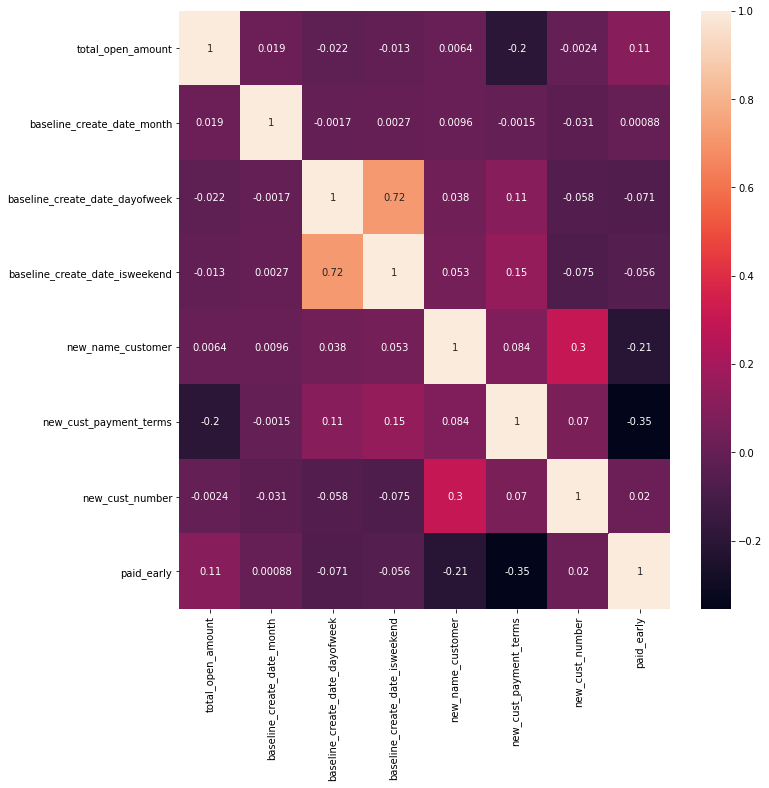

In [116]:
# Heatmap after dropping the features with correlation greater than 0.90
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X_train.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True)

## Random Forest

#### When training a tree, feature importance is calculated as the decrease in node impurity weighted in a tree.  The higher the value, the more important the feature.

                         Features  Importances
3  baseline_create_date_isweekend     0.019404
6                 new_cust_number     0.071606
5          new_cust_payment_terms     0.088864
7                      paid_early     0.089857
1      baseline_create_date_month     0.131034
2  baseline_create_date_dayofweek     0.142375
4               new_name_customer     0.170351
0               total_open_amount     0.286509


<AxesSubplot:ylabel='Features'>

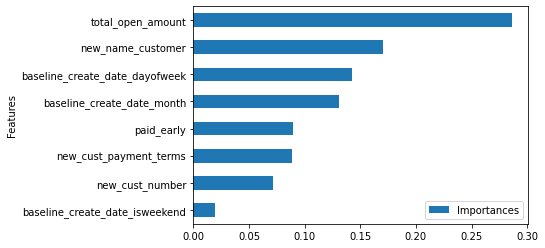

In [117]:
X_train_random_forest = X_train.iloc[ : , 3:]
from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier()

# fit the model to start training.
model.fit(X_train_random_forest, Y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train_random_forest.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
print(final_df)

# plot the feature importances in bars.
final_df.plot.barh(x='Features')

In [118]:
print(X_train.shape)
print(X_val1.shape)
print(X_val2.shape)
print(X_test.shape)

(31119, 11)
(4328, 9)
(3697, 9)
(9702, 9)


In [119]:
print(X_train.columns)
print('~'*50)
print(X_val1.columns)
print("~"*50)
print(X_val2.columns)
print("~"*50)
print(X_test.columns)

Index(['clear_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date_month',
       'baseline_create_date_dayofweek', 'baseline_create_date_isweekend',
       'new_name_customer', 'new_cust_payment_terms', 'new_cust_number',
       'paid_early'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['baseline_create_date', 'clear_date', 'doc_id',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'new_name_customer', 'new_cust_payment_terms', 'new_cust_number'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['baseline_create_date', 'clear_date', 'doc_id',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'new_name_customer', 'new_cust_payment_terms', 'new_cust_number'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['baseline_create_date', 'clear_date', 'doc_id',
       'document_create_date.1', 'due_in

In [120]:
#Selecting the features with importances greater than 0.1
X_train_new = X_train[['total_open_amount', 'new_name_customer', 'baseline_create_date_dayofweek', 'baseline_create_date_month']]
X_train_new

,total_open_amount,new_name_customer,baseline_create_date_dayofweek,baseline_create_date_month
0,16511,694,6,12
1,87305,455,6,12
2,51473,113,6,12
3,11539,190,6,12
4,1372,625,6,12
...,...,...,...,...
31114,94225,720,4,11
31115,24933,495,4,11
31116,78385,456,4,11
31117,17386,346,5,11


In [121]:
X_val1

,baseline_create_date,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,new_name_customer,new_cust_payment_terms,new_cust_number
0,2019-11-16,2019-11-26,1.930154e+09,2019-11-16,2019-12-01,16103.50,699,11,43
1,2019-11-16,2019-11-29,1.930158e+09,2019-11-16,2019-12-01,8868.50,720,3,72
2,2019-11-21,2019-11-25,2.960593e+09,2019-11-16,2019-12-01,29542.58,349,0,3
3,2019-11-26,2019-12-17,2.960591e+09,2019-11-16,2019-12-06,67401.52,720,0,72
4,2019-11-16,2019-11-27,1.930161e+09,2019-11-16,2019-12-01,378.67,689,11,43
...,...,...,...,...,...,...,...,...,...
4323,2020-01-15,2020-01-29,1.930400e+09,2020-01-15,2020-01-30,17605.87,720,3,72
4324,2020-01-15,2020-01-30,1.930396e+09,2020-01-15,2020-01-30,135083.60,396,3,49
4325,2020-01-15,2020-01-28,1.930401e+09,2020-01-15,2020-01-30,2710.56,692,11,43
4326,2020-01-15,2020-01-30,1.930401e+09,2020-01-15,2020-01-22,74039.90,720,19,72


In [123]:
X_val1['baseline_create_date_dayofweek'] = X_val1.baseline_create_date.dt.dayofweek #extracting dayofweek from baseline_create_date
X_val1['baseline_create_date_month'] = X_val1.baseline_create_date.dt.month   #extracting month from baseline_create_date

X_val2['baseline_create_date_dayofweek'] = X_val2.baseline_create_date.dt.dayofweek #extracting dayofweek from baseline_create_date
X_val2['baseline_create_date_month'] = X_val2.baseline_create_date.dt.month   #extracting month from baseline_create_date

X_test['baseline_create_date_dayofweek'] = X_test.baseline_create_date.dt.dayofweek #extracting dayofweek from baseline_create_date
X_test['baseline_create_date_month'] = X_test.baseline_create_date.dt.month   #extracting month from baseline_create_date


In [126]:
X_val1_new = X_val1[['total_open_amount', 'new_name_customer', 'baseline_create_date_dayofweek', 'baseline_create_date_month']]
X_val2_new = X_val2[['total_open_amount', 'new_name_customer', 'baseline_create_date_dayofweek', 'baseline_create_date_month']]
X_test_new = X_test[['total_open_amount', 'new_name_customer', 'baseline_create_date_dayofweek', 'baseline_create_date_month']]

In [127]:
X_val1_new

,total_open_amount,new_name_customer,baseline_create_date_dayofweek,baseline_create_date_month
0,16103.50,699,5,11
1,8868.50,720,5,11
2,29542.58,349,3,11
3,67401.52,720,1,11
4,378.67,689,5,11
...,...,...,...,...
4323,17605.87,720,2,1
4324,135083.60,396,2,1
4325,2710.56,692,2,1
4326,74039.90,720,2,1


# Modeling

In [133]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [134]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

# Linear regression

In [135]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression train_new')
clf = LinearRegression()
clf.fit(X_train_new, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_train_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_train, predicted))
R2_Score.append(r2_score(Y_train, predicted))


In [136]:
Algorithm.append('Linear Regression val1_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val1_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))


In [137]:
Algorithm.append('Linear Regression val2_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val2_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val2, predicted))
R2_Score.append(r2_score(Y_val2, predicted))


## 2.Support Vector Regression

In [138]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression train_new')
clf = SVR()
clf.fit(X_train_new, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_train_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_train, predicted))
R2_Score.append(r2_score(Y_train, predicted))


In [139]:
Algorithm.append('Support Vector Regression val1_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val1_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [140]:
Algorithm.append('Support Vector Regression val2_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val2_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val2, predicted))
R2_Score.append(r2_score(Y_val2, predicted))


## 3.Decision Tree Regressor 

In [141]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor val1_new')
clf = DecisionTreeRegressor()
clf.fit(X_train_new, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_train_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_train, predicted))
R2_Score.append(r2_score(Y_train, predicted))


In [142]:
Algorithm.append('Decision Tree Regressor val1_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val1_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))


In [143]:
Algorithm.append('Decision Tree Regressor val2_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val2_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val2, predicted))
R2_Score.append(r2_score(Y_val2, predicted))


## 4.Random Forest Regressor

In [144]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor train_new')
clf = RandomForestRegressor()
clf.fit(X_train_new, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_train_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_train, predicted))
R2_Score.append(r2_score(Y_train, predicted))


In [145]:
Algorithm.append('Random Forest Regressor val1_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val1_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [146]:
Algorithm.append('Random Forest Regressor val2_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val2_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val2, predicted))
R2_Score.append(r2_score(Y_val2, predicted))


## 5.XGB Regressor

In [147]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor train_new')
clf = xgb.XGBRegressor()
clf.fit(X_train_new, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_train_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_train, predicted))
R2_Score.append(r2_score(Y_train, predicted))


In [148]:
Algorithm.append('XGB Regressor val1_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val1_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))


In [149]:
Algorithm.append('XGB Regressor val2_new')

# Predicting the Test Set Results
predicted = clf.predict(X_val2_new)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_val2, predicted))
R2_Score.append(r2_score(Y_val2, predicted))


##Printing The MSE and R2 Scores

In [150]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [151]:
# Score Card
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression train_new,126.941726,0.000578
1,Linear Regression val1_new,63.410919,-0.003771
2,Linear Regression val2_new,113.668816,-0.006969
3,Support Vector Regression train_new,127.973846,-0.007548
4,Support Vector Regression val1_new,63.074121,0.001561
5,Support Vector Regression val2_new,112.978162,-0.000850
6,Decision Tree Regressor val1_new,0.077300,0.999391
7,Decision Tree Regressor val1_new,179.283503,-1.837989
8,Decision Tree Regressor val2_new,236.242764,-1.092826
9,Random Forest Regressor train_new,14.102507,0.888970


# saving model

In [152]:
import pickle
# pickle.dump(clf,open('model_final','wb'))
clf=pickle.load(open('model_final','rb'))


# Predicting Delay


In [153]:
# Fitting XGBoost Regressor to the Training Set
clf = xgb.XGBRegressor()
clf.fit(X_train_new, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test_new)


In [154]:
predicted

array([8.8229817e-01, 6.1293030e-01, 2.7070639e+00, ..., 5.1425118e-04,
       5.4777622e+00, 1.1381931e+00], dtype=float32)

In [155]:
Y_test['delay'] = predicted.astype(int)

In [156]:
Y_test

,delay
0,0
1,0
2,2
3,1
4,0
...,...
9697,3
9698,4
9699,0
9700,5


In [157]:
X_test['clear_date'] = pd.to_datetime(X_test['clear_date'])
X_test['clear_date'] = X_test['due_in_date']+pd.to_timedelta(Y_train['delay'], unit='d')

In [158]:
#checking clear_date
X_test

,baseline_create_date,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,new_name_customer,new_cust_payment_terms,new_cust_number,baseline_create_date_dayofweek,baseline_create_date_month
0,2020-02-27,2020-04-27,1.930571e+09,2020-02-27,2020-05-02,8510.40,492,10,38,3,2
1,2020-02-27,2020-03-13,1.930568e+09,2020-02-27,2020-03-13,15672.80,321,3,46,3,2
2,2020-02-27,2020-03-14,1.930570e+09,2020-02-27,2020-03-13,72076.42,720,3,72,3,2
3,2020-02-28,2020-03-09,2.960617e+09,2020-02-27,2020-03-09,131893.29,720,0,72,4,2
4,2020-02-27,2020-03-21,1.930578e+09,2020-02-27,2020-03-13,7257.60,720,3,72,3,2
...,...,...,...,...,...,...,...,...,...,...,...
9697,2020-05-14,2020-05-29,2.960634e+09,2020-05-14,2020-05-24,7032.80,720,0,72,3,5
9698,2020-05-14,2020-05-27,1.930904e+09,2020-05-14,2020-05-29,16099.20,720,3,72,3,5
9699,2020-05-15,2020-06-02,1.930902e+09,2020-05-15,2020-05-30,19798.67,720,3,72,4,5
9700,2020-05-18,2020-05-29,1.930915e+09,2020-05-18,2020-06-02,21362.82,720,3,72,0,5


In [159]:
# Putting the customers in bucket according to delay.
cond = [
    (Y_test['delay'] < 0),
    (Y_test['delay'] >= 0) & (Y_test['delay'] <= 15),
    (Y_test['delay'] >= 16) & (Y_test['delay'] <= 30),
    (Y_test['delay'] >= 31) & (Y_test['delay'] <= 45),
    (Y_test['delay'] >= 46) & (Y_test['delay'] <= 60),
    (Y_test['delay'] > 60),
    ]

val = ['Less than 0 Days','0-15 Days','15-30 Days','30-45 Days','45-60 Days','More than 60 Days']

# create 'aging_bucket' column and use np.select to assign values to it using our lists as arguments
X_test['aging_bucket'] = np.select(cond, val)

X_test[['due_in_date', 'clear_date', 'aging_bucket']]

,due_in_date,clear_date,aging_bucket
0,2020-05-02,2020-04-27,0-15 Days
1,2020-03-13,2020-03-13,0-15 Days
2,2020-03-13,2020-03-14,0-15 Days
3,2020-03-09,2020-03-09,0-15 Days
4,2020-03-13,2020-03-21,0-15 Days
...,...,...,...
9697,2020-05-24,2020-05-29,0-15 Days
9698,2020-05-29,2020-05-27,0-15 Days
9699,2020-05-30,2020-06-02,0-15 Days
9700,2020-06-02,2020-05-29,0-15 Days


In [160]:
X_test

,baseline_create_date,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,new_name_customer,new_cust_payment_terms,new_cust_number,baseline_create_date_dayofweek,baseline_create_date_month,aging_bucket
0,2020-02-27,2020-04-27,1.930571e+09,2020-02-27,2020-05-02,8510.40,492,10,38,3,2,0-15 Days
1,2020-02-27,2020-03-13,1.930568e+09,2020-02-27,2020-03-13,15672.80,321,3,46,3,2,0-15 Days
2,2020-02-27,2020-03-14,1.930570e+09,2020-02-27,2020-03-13,72076.42,720,3,72,3,2,0-15 Days
3,2020-02-28,2020-03-09,2.960617e+09,2020-02-27,2020-03-09,131893.29,720,0,72,4,2,0-15 Days
4,2020-02-27,2020-03-21,1.930578e+09,2020-02-27,2020-03-13,7257.60,720,3,72,3,2,0-15 Days
...,...,...,...,...,...,...,...,...,...,...,...,...
9697,2020-05-14,2020-05-29,2.960634e+09,2020-05-14,2020-05-24,7032.80,720,0,72,3,5,0-15 Days
9698,2020-05-14,2020-05-27,1.930904e+09,2020-05-14,2020-05-29,16099.20,720,3,72,3,5,0-15 Days
9699,2020-05-15,2020-06-02,1.930902e+09,2020-05-15,2020-05-30,19798.67,720,3,72,4,5,0-15 Days
9700,2020-05-18,2020-05-29,1.930915e+09,2020-05-18,2020-06-02,21362.82,720,3,72,0,5,0-15 Days
